# Programming for Data Analysis Project 2018

This jupyter notebook contains a project for the course Programming for Data Analysis. This project will attempt to model and synthesize data from a real-world phenomenon. It also investigates the types of variables involved and the relationships of the variables with each other.

The phenomenon chosen for this project is based on a study [1] to determine the short term risk of death in people following healthcare-related MRSA infection. The data represents the number of people who is infected with MRSA and grouped across gender, age and mortality within 7 and 30 days post infection. 



## References

[1] Lamagni TL, Potz N, Powell D, Pebody R, Wilson J, Duckworth G, Mortality in patients with meticillin-resistant Staphylococcus aureus
bacteraemia, England 2004-2005. Journal of Hospital Infection, 2010. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# total mortality over people infected with MRSA
infectedmale = 5575
infectedfemale = 3426
malemort = 2105
femalemort = 1345
mortalityrate = (malemort + femalemort) / (infectedmale + infectedfemale)

In [4]:
totalInfection = infectedmale + infectedfemale
totalInfection

9001

In [5]:
mortalityrate

0.38329074547272524

In [6]:
maleInfectionRate = infectedmale / totalInfection
maleInfectionRate

0.6193756249305633

In [7]:
totalmort = malemort + femalemort
totalmort

3450

In [8]:
expectedmalemort = infectedmale * mortalityrate
expectedmalemort

2136.8459060104433

In [9]:
expectedfemalemort = infectedfemale * mortalityrate
expectedfemalemort

1313.1540939895567

In [34]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278)})

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct'),
 Text(0,0,'Nov'),
 Text(0,0,'Dec')]

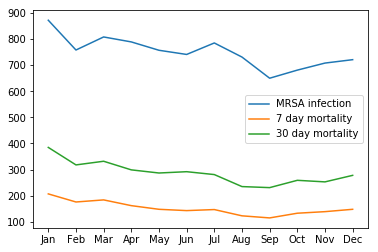

In [35]:
# line plot to visualize relationship of month to infection and mortality counts. 
ax = monthlymort.plot()
ax.set_xticks(monthlymort.index)
ax.set_xticklabels(monthlymort.Month)

In [38]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278), 'rate_of_infection': (28.129, 27.071, 26.065, 26.3, 24.419, 24.7, 25.323, 23.581, 21.667, 22.7, 23.6, 23.258)})

In [39]:

monthlymort['7dayRate'] = monthlymort['7 day mortality'] / monthlymort['rate_of_infection']
monthlymort['30dayRate'] = monthlymort['30 day mortality'] / monthlymort['rate_of_infection']

In [12]:
monthlymort

,Month,MRSA infection,7 day mortality,30 day mortality,rate_of_infection,7dayM,30dayM
0,Jan,872,207,385,28.129,7.358953,13.686942
1,Feb,758,176,318,27.071,6.501422,11.746888
2,Mar,808,184,332,26.065,7.059275,12.737387
3,Apr,789,162,299,26.300,6.159696,11.368821
4,May,757,148,287,24.419,6.060854,11.753143
5,Jun,741,143,292,24.700,5.789474,11.821862
6,Jul,785,147,281,25.323,5.804999,11.096632
7,Aug,731,123,235,23.581,5.216064,9.965650
8,Sep,650,115,231,21.667,5.307611,10.661374
9,Oct,681,133,259,22.700,5.859031,11.409692


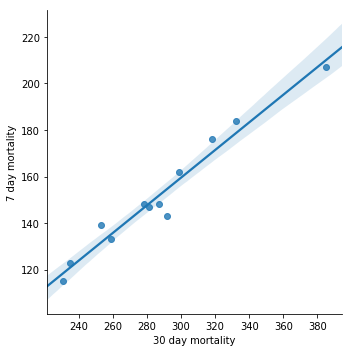

In [36]:
sns.lmplot(y="7 day mortality", x="30 day mortality", data=monthlymort)

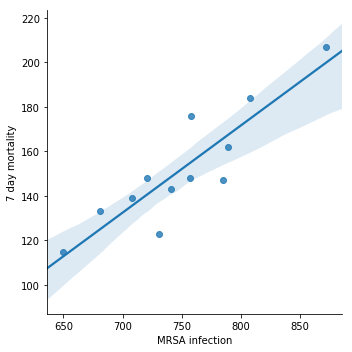

In [15]:
sns.lmplot(x = "MRSA infection", y = "7 day mortality", data = monthlymort)

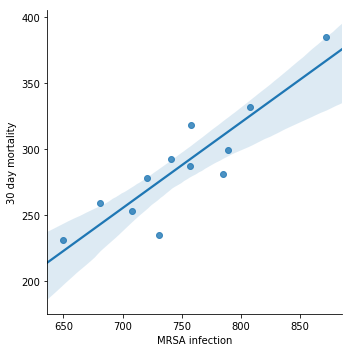

In [16]:
sns.lmplot(x = "MRSA infection", y = "30 day mortality", data = monthlymort)

In [17]:
monthlymort.sum()

Month                JanFebMarAprMayJunJulAugSepOctNovDec
MRSA infection                                       9001
7 day mortality                                      1825
30 day mortality                                     3450
rate_of_infection                                 296.813
7dayM                                             73.3706
30dayM                                            138.922
dtype: object

In [18]:
# total monthly infection / days in a year = average daily infection
9001/365

24.660273972602738

In [19]:
ageMort = pd.DataFrame({"Age": ["<15", '15-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85'], "Infections": (126, 377, 462, 696, 1189, 1900, 2738, 1513), "7 Day Mortality": (2, 12, 42, 94, 193, 360, 697, 425), "30 Day Mortality" : (8, 29, 86, 182, 323, 697, 1266, 859)})
ageMort

,Age,Infections,7 Day Mortality,30 Day Mortality
0,<15,126,2,8
1,15-34,377,12,29
2,35-44,462,42,86
3,45-54,696,94,182
4,55-64,1189,193,323
5,65-74,1900,360,697
6,75-84,2738,697,1266
7,>85,1513,425,859


In [20]:
ageMort.std()

Infections          889.474072
7 Day Mortality     247.184973
30 Day Mortality    460.494687
dtype: float64

[Text(0,0,'<15'),
 Text(0,0,'15-34'),
 Text(0,0,'35-44'),
 Text(0,0,'45-54'),
 Text(0,0,'55-64'),
 Text(0,0,'65-74'),
 Text(0,0,'75-84'),
 Text(0,0,'>85')]

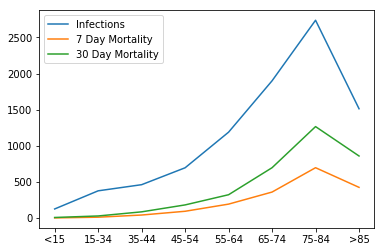

In [21]:
# line plot to visualize relationship of Age to infections and mortality counts. 
ax = ageMort.plot()
ax.set_xticks(ageMort.index)
ax.set_xticklabels(ageMort.Age)

In [22]:
ageMort['infection/year'] =  ageMort['Infections']/365 
ageMort['7dayP'] = ageMort['7 Day Mortality'] / ageMort['Infections']
ageMort['30dayP'] = ageMort['30 Day Mortality'] / ageMort['Infections']

In [23]:
ageMort

,Age,Infections,7 Day Mortality,30 Day Mortality,infection/year,7dayP,30dayP
0,<15,126,2,8,0.345205,0.015873,0.063492
1,15-34,377,12,29,1.032877,0.031830,0.076923
2,35-44,462,42,86,1.265753,0.090909,0.186147
3,45-54,696,94,182,1.906849,0.135057,0.261494
4,55-64,1189,193,323,3.257534,0.162321,0.271657
5,65-74,1900,360,697,5.205479,0.189474,0.366842
6,75-84,2738,697,1266,7.501370,0.254565,0.462381
7,>85,1513,425,859,4.145205,0.280899,0.567746


In [24]:
# <15   - 0.35, 0.02, 0.06
# 15-34 - 1.03, 0.03, 0.08
# 35-44 - 1.27, 0.09, 19
# 45-54 - 1.91, 0.14, 0.26
# 55-64 - 3.26, 0.16, .27
# 65-74 - 5.21, 0.18, 0.37
# 75-84 - 7.50, 0.25, 0.46 
# >85   - 4.15, 0.28, 0.57  


In [25]:
# Simulated data for Infections according to age per year and 7 and 30 day mortality

# The <15 category uses the binomial distribution
# For the rest, the normal distribution is used instead
a = pd.DataFrame({'Sim<15': np.random.binomial(1, .35, 365), 'Sim 15-34': np.random.normal(1.03, 0.01, 365), 'Sim 35-44': np.random.normal(1.27, 0.01, 365), 'Sim 45-54': np.random.normal(1.91, 0.01, 365), 'Sim 55-64': np.random.normal(3.26, 0.01, 365), 'Sim 65-74':np.random.normal(5.21, 0.01, 365), 'Sim 75-84': np.random.normal(7.5, 0.01, 365), 'Sim >85': np.random.normal(4.15, 0.01, 365) })


In [26]:
a

,Sim<15,Sim 15-34,Sim 35-44,Sim 45-54,Sim 55-64,Sim 65-74,Sim 75-84,Sim >85
0,0,1.013615,1.256252,1.922386,3.261370,5.217509,7.495238,4.150145
1,0,1.030352,1.261665,1.920553,3.241910,5.221839,7.482808,4.163496
2,1,1.024718,1.282629,1.920053,3.256990,5.213526,7.497678,4.157135
3,1,1.029916,1.270208,1.913190,3.253367,5.227820,7.517092,4.147572
4,0,1.050643,1.277146,1.913979,3.249025,5.197126,7.483543,4.133168
5,0,1.024404,1.270987,1.911262,3.253917,5.209729,7.508653,4.154136
6,0,1.031250,1.270134,1.917278,3.253660,5.212741,7.488517,4.166201
7,0,1.026725,1.268790,1.917220,3.257747,5.221347,7.527629,4.157074
8,0,1.043512,1.270400,1.917854,3.254092,5.206774,7.500198,4.139728
9,0,1.044212,1.276161,1.896779,3.251339,5.204815,7.508214,4.161365


In [27]:
a.sum()

Sim<15        128.000000
Sim 15-34     375.609270
Sim 35-44     463.735876
Sim 45-54     697.201805
Sim 55-64    1190.115957
Sim 65-74    1901.729455
Sim 75-84    2737.483195
Sim >85      1514.677339
dtype: float64

In [28]:
#Fake data
n = np.arange(0, 100, 1)
s = 20 * n + 10 + np.random.normal (0.0, 5.0, n.size)

In [29]:
s

array([  10.39368043,   33.96945013,   46.08254938,   73.82714542,
         85.72285163,  102.36729515,  134.17168611,  146.52470707,
        169.42025599,  206.53405147,  206.96635506,  225.6129439 ,
        252.24722259,  262.26431452,  293.2093233 ,  314.27368659,
        329.21293842,  350.92011019,  369.79413355,  397.14222618,
        414.71846822,  424.42417597,  446.7576953 ,  462.50229374,
        487.1872797 ,  513.21977307,  528.18882237,  546.88171734,
        582.75313641,  591.37866504,  613.40376304,  632.95063252,
        651.40147991,  678.32839046,  689.60430393,  706.76478271,
        739.83096018,  755.67362826,  765.82764579,  803.81416357,
        816.82852805,  822.26120546,  851.36079716,  881.25254082,
        890.18792909,  916.30154483,  921.46164563,  947.08023659,
        967.99088692,  986.83402629, 1015.43355266, 1028.94855751,
       1049.19011368, 1058.86813163, 1087.22013851, 1113.43506104,
       1135.09662247, 1152.80970458, 1173.00679897, 1190.57061

In [30]:
# Fake data for daily infection of males and females
infection = pd.DataFrame({"maleInfection": np.random.binomial(25, .62, 365), "femaleInfection": np.random.binomial(25, .38, 365)})
infection

,maleInfection,femaleInfection
0,15,10
1,14,11
2,13,7
3,17,10
4,17,6
5,15,10
6,13,5
7,14,9
8,18,9
9,10,8


In [31]:
infection.sum()

maleInfection      5686
femaleInfection    3436
dtype: int64

In [32]:
infection.describe()

,maleInfection,femaleInfection
count,365.000000,365.000000
mean,15.578082,9.413699
std,2.397930,2.476556
min,10.000000,2.000000
25%,14.000000,8.000000
50%,16.000000,9.000000
75%,17.000000,11.000000
max,22.000000,17.000000


In [33]:
pd.__version__

'0.23.0'